# Import lib

In [5]:
pip install nltk

     ---------------------------------------- 1.5/1.5 MB 6.4 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ---------------------------------------- 96.6/96.6 kB 5.4 MB/s eta 0:00:00
     ------------------------------------- 268.0/268.0 kB 16.1 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: C:\Users\VINAY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [9]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: C:\Users\VINAY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [13]:
pip install scikit-learn

     ---------------------------------------- 8.4/8.4 MB 8.5 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: C:\Users\VINAY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [53]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: C:\Users\VINAY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [41]:
import numpy as np 
import pandas as pd 

In [42]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VINAY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading libraries

In [3]:
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(12,6)
sns.set_theme('notebook')

# Loading a file (Stress.csv)

In [4]:
human_stress=pd.read_csv("D:/Stress detection/Stress.csv")
human_stress.head(10)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,17554,1,1.0,1517274027,2,3.531124,...,1.000,1.1818,1.0,1.70415,1.44396,1.82046,0.75,5,4.338429,-0.550000
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,165,0,0.8,1512854409,6,8.331463,...,1.000,1.1250,1.0,1.66985,1.57757,1.89926,0.88,29,8.394244,0.277381
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,33053,1,0.8,1483582174,1,0.403679,...,1.000,1.1429,1.0,1.69549,1.44860,1.88963,1.00,0,1.028654,-0.079630
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,7581,1,0.6,1514843984,134,5.381111,...,1.000,1.0000,1.0,1.73571,1.71471,1.93607,0.94,43,5.991049,-0.272917
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1517,1,1.0,1490428087,20,1.562351,...,1.000,1.1250,1.0,1.74956,1.67353,1.89320,0.80,6,2.851935,-0.117262


In [5]:
human_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [6]:
human_stress['subreddit'].value_counts()

subreddit
ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: count, dtype: int64

In [7]:
human_stress.head(10)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,17554,1,1.0,1517274027,2,3.531124,...,1.000,1.1818,1.0,1.70415,1.44396,1.82046,0.75,5,4.338429,-0.550000
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,165,0,0.8,1512854409,6,8.331463,...,1.000,1.1250,1.0,1.66985,1.57757,1.89926,0.88,29,8.394244,0.277381
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,33053,1,0.8,1483582174,1,0.403679,...,1.000,1.1429,1.0,1.69549,1.44860,1.88963,1.00,0,1.028654,-0.079630
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,7581,1,0.6,1514843984,134,5.381111,...,1.000,1.0000,1.0,1.73571,1.71471,1.93607,0.94,43,5.991049,-0.272917
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1517,1,1.0,1490428087,20,1.562351,...,1.000,1.1250,1.0,1.74956,1.67353,1.89320,0.80,6,2.851935,-0.117262


# Feature Engineering 

In [8]:
human_stress['len']=[len(text) for text in human_stress['text']]

In [9]:
human_stress['label_in_value']=human_stress['label'].map({0:'No Stress',1:"Stress"})

In [10]:
human_stress['date']=[ datetime.fromtimestamp(value) for value in human_stress['social_timestamp']]


In [11]:
human_stress['day']=[value for value in human_stress['date'].dt.day]

In [12]:
human_stress['month']=[value for value in human_stress['date'].dt.month]

In [13]:
human_stress['year']=[value for value in human_stress['date'].dt.year]

In [14]:
human_stress['hour']=[value for value in human_stress['date'].dt.hour]

In [15]:
human_stress['second']=[value for value in human_stress['date'].dt.second]

In [16]:
human_stress['day_name']=[value for value in human_stress['date'].dt.day_name()]

In [17]:
human_stress['day_of_week']=[value for value in human_stress['date'].dt.day_of_week]

In [18]:
human_stress.head(10)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,len,label_in_value,date,day,month,year,hour,second,day_name,day_of_week
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,571,Stress,2018-03-21 12:09:13,21,3,2018,12,13,Wednesday,2
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,588,No Stress,2018-05-22 22:53:37,22,5,2018,22,37,Tuesday,1
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,847,Stress,2018-09-03 06:16:45,3,9,2018,6,45,Monday,0
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1277,Stress,2018-01-20 11:55:55,20,1,2018,11,55,Saturday,5
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,533,Stress,2018-10-18 02:13:25,18,10,2018,2,25,Thursday,3
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,17554,1,1.0,1517274027,2,3.531124,...,539,Stress,2018-01-30 06:30:27,30,1,2018,6,27,Tuesday,1
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,165,0,0.8,1512854409,6,8.331463,...,588,No Stress,2017-12-10 02:50:09,10,12,2017,2,9,Sunday,6
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,33053,1,0.8,1483582174,1,0.403679,...,548,Stress,2017-01-05 07:39:34,5,1,2017,7,34,Thursday,3
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,7581,1,0.6,1514843984,134,5.381111,...,436,Stress,2018-01-02 03:29:44,2,1,2018,3,44,Tuesday,1
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1517,1,1.0,1490428087,20,1.562351,...,375,Stress,2017-03-25 13:18:07,25,3,2017,13,7,Saturday,5


# Removing confidenece (column) as it will create leakage

In [19]:
remove_cols=['post_id','sentence_range','confidence','social_timestamp','date']
human_stress.drop(remove_cols,axis=1,inplace=True)

In [20]:
human_stress.groupby('subreddit')['len'].describe().sort_values('count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
ptsd,584.0,435.296233,157.677362,6.0,330.00,417.5,524.25,1271.0
relationships,552.0,463.898551,167.292838,142.0,354.00,428.0,539.00,1277.0
anxiety,503.0,447.763419,168.015419,6.0,338.00,418.0,532.50,1358.0
domesticviolence,316.0,436.512658,165.901395,6.0,335.00,406.5,512.25,1308.0
assistance,289.0,429.705882,143.763236,32.0,339.00,417.0,503.00,915.0
survivorsofabuse,245.0,473.485714,194.551557,88.0,348.00,437.0,559.00,1606.0
homeless,168.0,449.851190,177.114248,155.0,342.75,425.5,525.25,1281.0
almosthomeless,80.0,447.412500,208.517777,116.0,329.50,417.5,519.00,1639.0
stress,64.0,505.593750,203.001816,172.0,361.50,492.5,601.25,1354.0


# Data Visualization

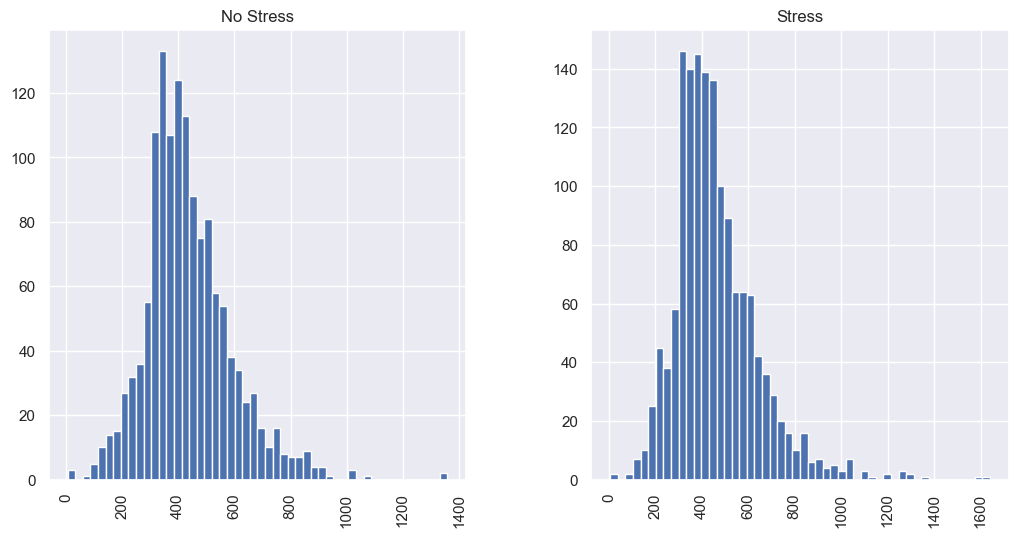

In [21]:
human_stress.hist(column='len',by='label_in_value',bins=50)
plt.show()

# There is hardly any difference between stress and no stress distribution

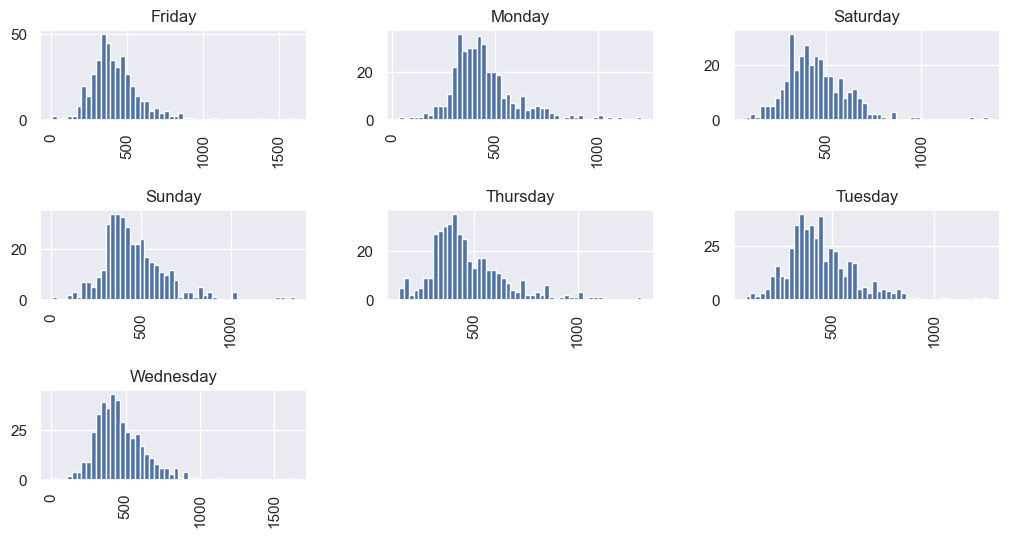

In [22]:
fig, ax = plt.subplots()
human_stress.hist(column='len',by='day_name',bins=50,ax=ax)
plt.subplots_adjust(hspace=1)
plt.show()

# Friday and Tuesday for length of the text are high

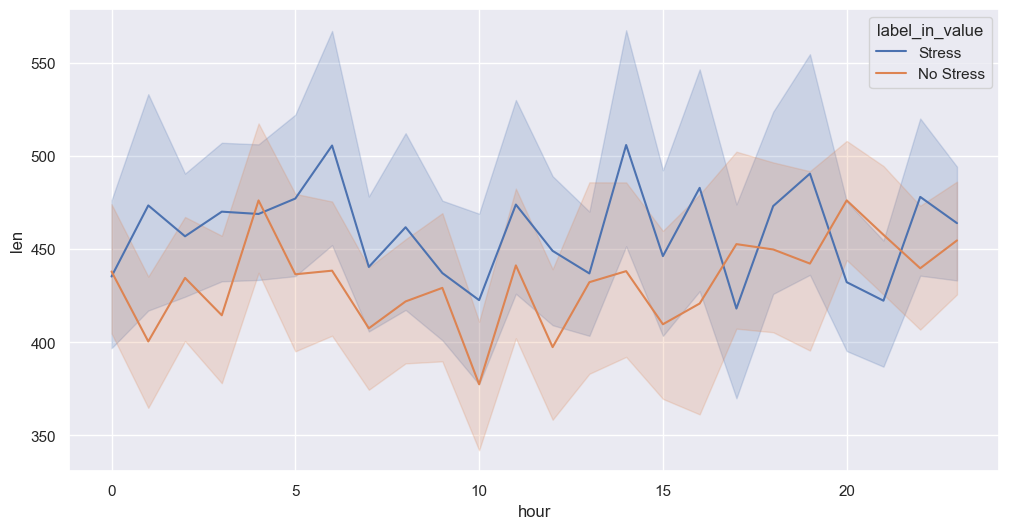

In [23]:
sns.lineplot(data=human_stress,x='hour',y='len',hue='label_in_value')
plt.show()

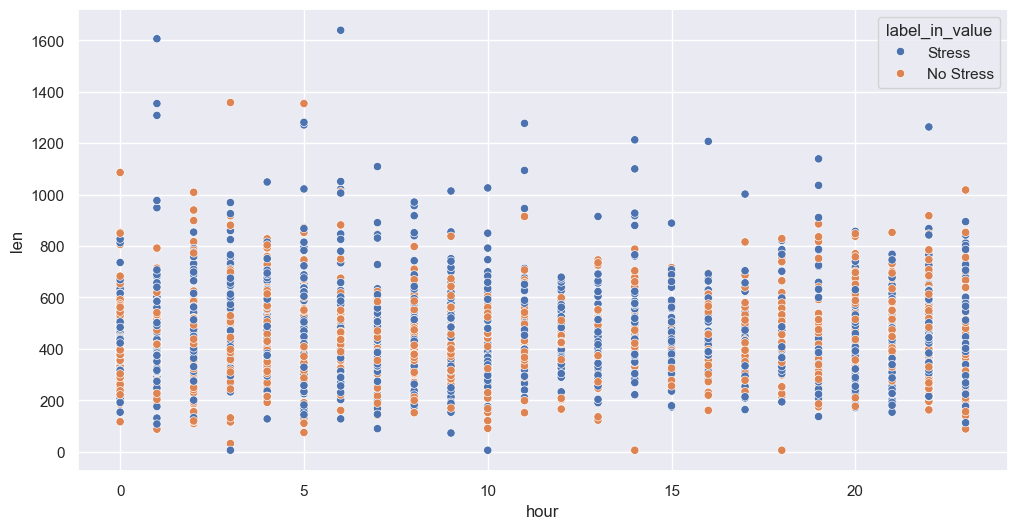

In [24]:
sns.scatterplot(data=human_stress,x='hour',y='len',hue='label_in_value')
plt.show()

# Long texts are a symptom of stress 

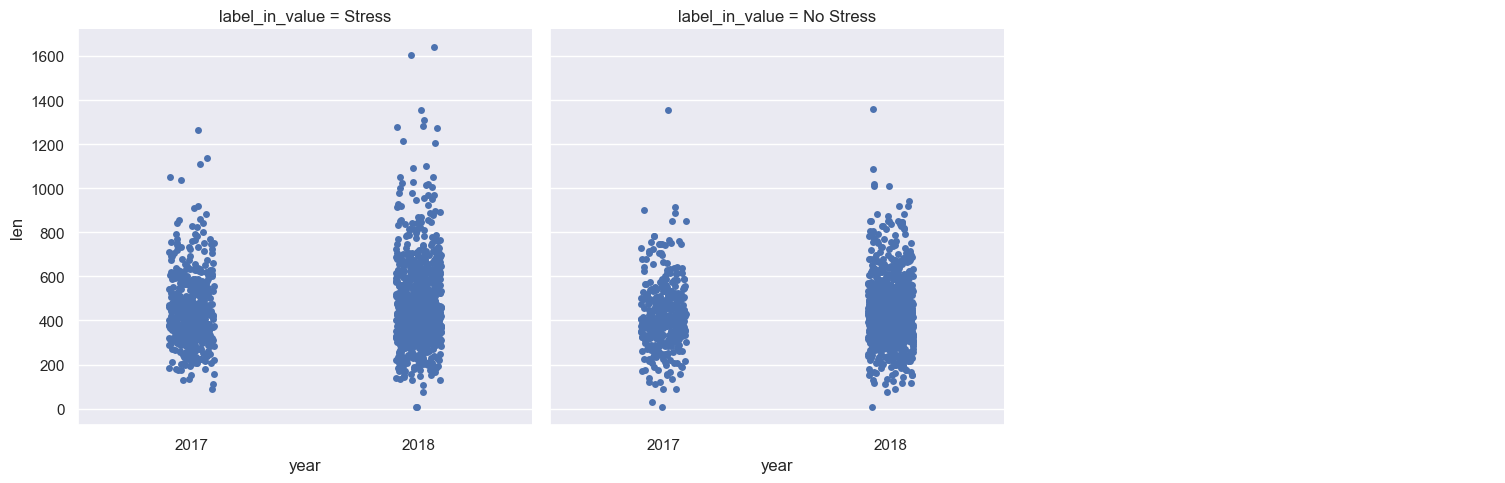

In [25]:
sns.catplot(data=human_stress,x='year',y='len',col='label_in_value',sharex=False,col_wrap=3)
plt.show()

# More length of 1000 text is represent stress and cases has been increased in from 2017 to 2018

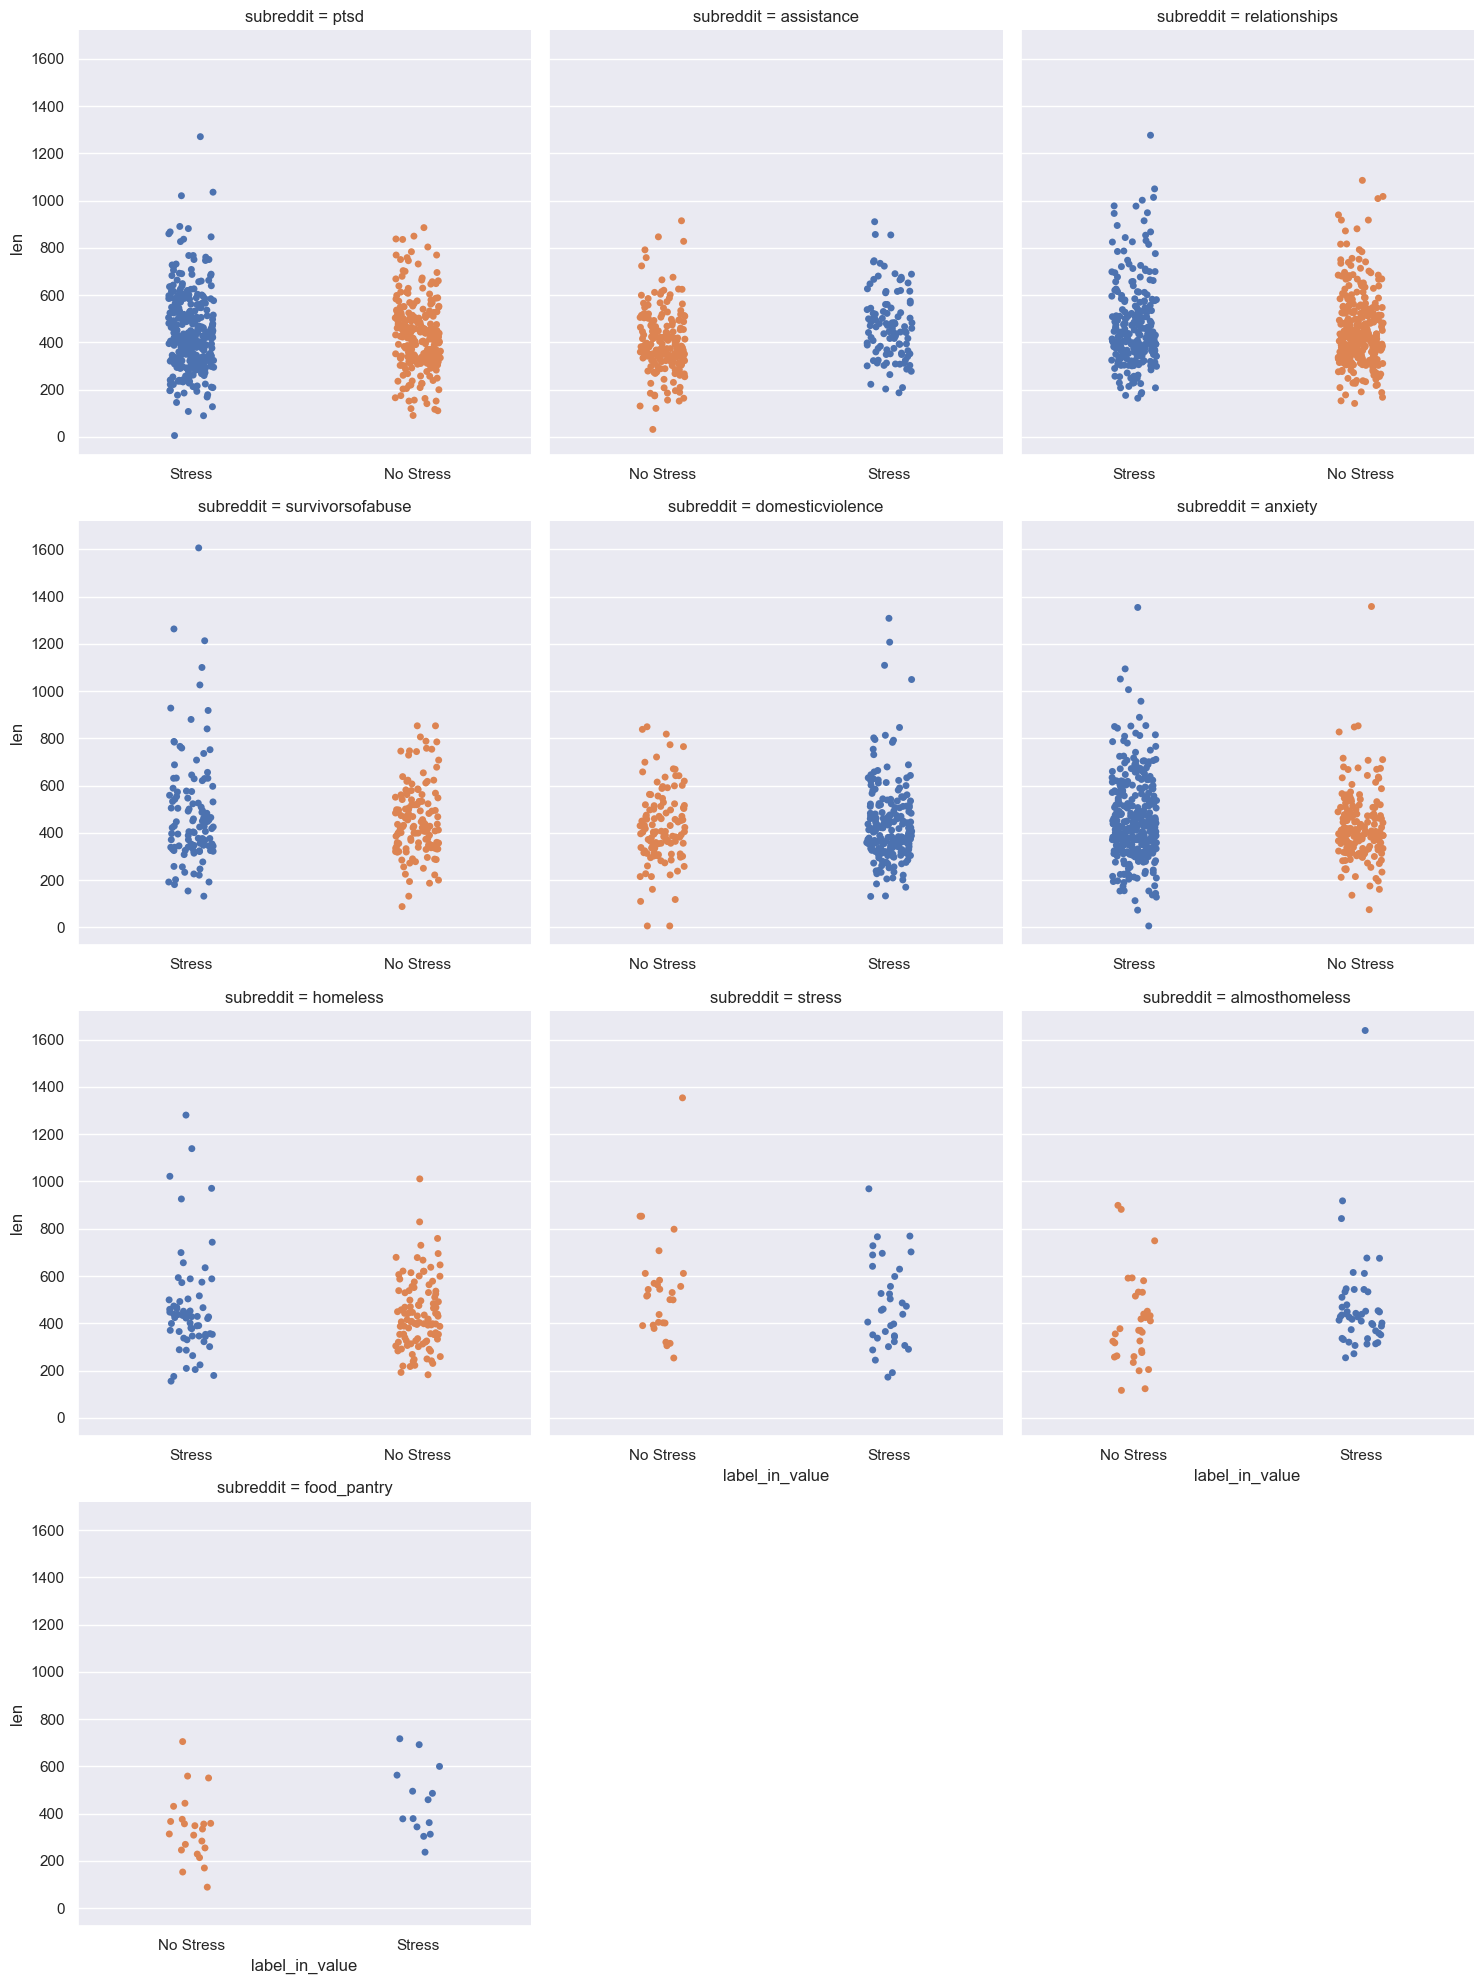

In [26]:
sns.catplot(data=human_stress,x='label_in_value',y='len',col='subreddit',col_wrap=3,hue='label_in_value',sharex=False)
plt.show()

# Major cases are in
1. ptsd
2. survivor of abuse
3. Domestic violence
4. Anxiety
5. Homeless

# Spliting the data for Testing and Tranning 

In [27]:
X=human_stress['text'].values
y=human_stress['label_in_value'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
# function for cleaning the text
def text_clean(text_message): #........#
    
    remove_punc=[ text for text in text_message if text not in string.punctuation]
    
    remove_punc= ''.join(remove_punc)
    
    return [word for word in remove_punc.split() if word.lower() not in stopwords.words('english')]


# Testing of function

In [30]:
human_stress['text'].head(5)

0    He said he had not felt that way before, sugge...
1    Hey there r/assistance, Not sure if this is th...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    October is Domestic Violence Awareness Month a...
Name: text, dtype: object

In [31]:
human_stress['text'].head(5).apply(text_clean)


0    [said, felt, way, suggeted, go, rest, TRIGGER,...
1    [Hey, rassistance, sure, right, place, post, g...
2    [mom, hit, newspaper, shocked, would, knows, d...
3    [met, new, boyfriend, amazing, kind, sweet, go...
4    [October, Domestic, Violence, Awareness, Month...
Name: text, dtype: object

# Natural Language Processing 

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.13.0


# Copying the data in new variable 

In [33]:
human_stree_nlp=human_stress.copy()

# Spliting data again according to nlp

In [34]:
X_train_nlp, X_test_nlp, y_train_nlp, y_test_nlp = train_test_split(human_stree_nlp['text'], 
                                                                    human_stree_nlp['label'], 
                                                                    test_size=0.20, 
                                                                    random_state=42)

# Clean the text column of train and text 

In [35]:
X_train_nlp=X_train_nlp.apply(text_clean)

In [36]:
X_test_nlp= X_test_nlp.apply(text_clean)

In [37]:
vocab_size=50000
embedding_dim=96
max_length=2000
trunc_type='post'
oov_tok="<oov>"

In [38]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train_nlp)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(X_train_nlp)
train_padded = pad_sequences(train_seqs, maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(X_test_nlp)
test_padded = pad_sequences(test_seqs,maxlen=max_length)


# Define a model of NLP 

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model with loss function, optimizer and metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 96)          4800000   
                                                                 
 global_average_pooling1d (  (None, 96)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 72)                6984      
                                                                 
 dense_1 (Dense)             (None, 1)                 73        
                                                                 
Total params: 4807057 (18.34 MB)
Trainable params: 4807057 (18.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training a model

In [43]:
num_epochs = 50

##train the model with training and validation set
history = model.fit(
    train_padded,   #training sequence
    y_train_nlp, # training labels
    epochs=num_epochs, 
    validation_data=(test_padded, y_test_nlp) # test data
    )

Epoch 1/50
71/71 [==============================] - 13s 140ms/step - loss: 0.6937 - accuracy: 0.5115 - val_loss: 0.6904 - val_accuracy: 0.5370
Epoch 2/50
71/71 [==============================] - 9s 134ms/step - loss: 0.6925 - accuracy: 0.5211 - val_loss: 0.6911 - val_accuracy: 0.5370
Epoch 3/50
71/71 [==============================] - 10s 145ms/step - loss: 0.6922 - accuracy: 0.5211 - val_loss: 0.6907 - val_accuracy: 0.5370
Epoch 4/50
71/71 [==============================] - 10s 140ms/step - loss: 0.6924 - accuracy: 0.5211 - val_loss: 0.6909 - val_accuracy: 0.5370
Epoch 5/50
71/71 [==============================] - 9s 130ms/step - loss: 0.6923 - accuracy: 0.5211 - val_loss: 0.6907 - val_accuracy: 0.5370
Epoch 6/50
71/71 [==============================] - 9s 130ms/step - loss: 0.6917 - accuracy: 0.5211 - val_loss: 0.6903 - val_accuracy: 0.5370
Epoch 7/50
71/71 [==============================] - 9s 122ms/step - loss: 0.6916 - accuracy: 0.5211 - val_loss: 0.6902 - val_accuracy: 0.5370
Epo

# Checking the loss and accuracy of train data and test data

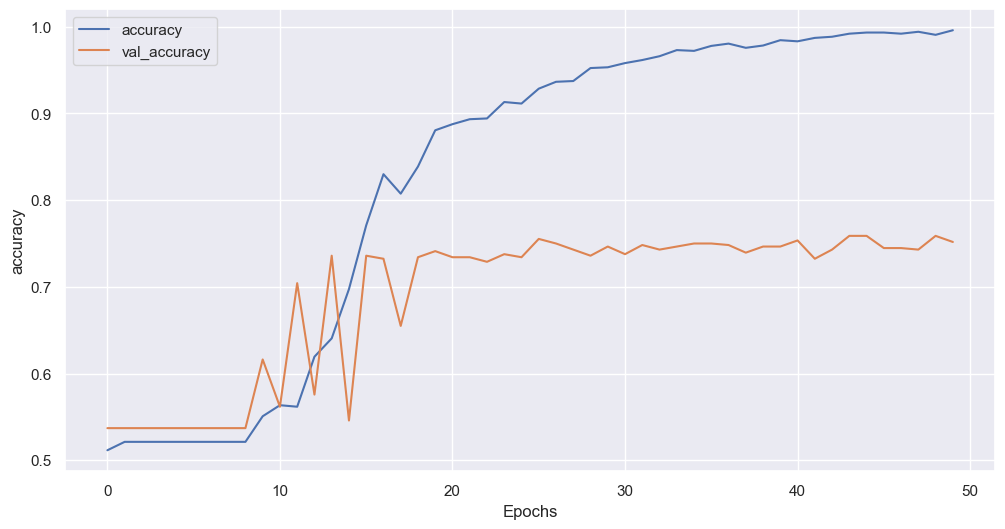

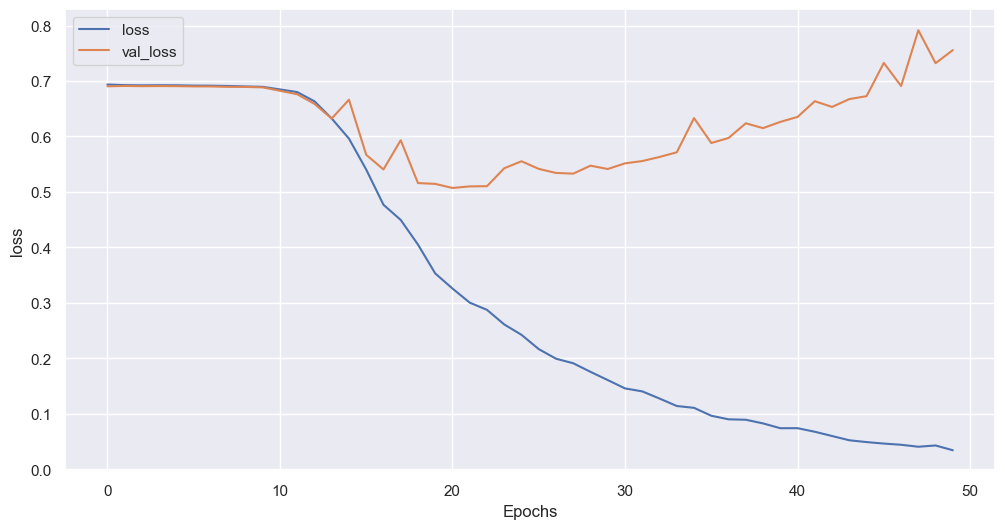

In [44]:
##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+ metric])
  plt.legend([metric, 'val_'+ metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()
  
##plot accuracy
plot_metrics(history, "accuracy")

##plot loss
plot_metrics(history, "loss")

# Checking the model with unseen random inputs

# The value ranges from 0 to 0.5 indicate no stress, and as the values climb from 0.5 to 1, the degree of stress is likewise increased. This shows how effectively the model has done.

In [45]:
sentence = ["I am not feeling happy", 
            "these days i have been working on crucial projects and i have to focus on time delivery",
            "i am on holidays",
            'I bet all my money yesterday and lost it all ',
            "My girlfriend is in the hospital",
           "I lost my job",
            "This year i am not going to this my current year goal and i do not know how i am going to deal with this",
           "The stress is affecting every aspect of my life. I'm not enjoying things I used to, and I'm struggling to find joy in anything",
           "I'm constantly second-guessing myself and worrying about making mistakes. The stress is making it hard to make even simple decisions",
           "I'm struggling to find the motivation to do anything. The stress has drained my energy and left me feeling hopeless",
           "I feel like I'm in a constant state of crisis"]
np_sentence=pd.Series(sentence).apply(text_clean)
##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(np_sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
# print(model.predict(padded_seqs))
output={}
for i,seq in enumerate(padded_seqs):
    output[sentence[i]]=model.predict(np.array([seq]))[0]
output = pd.DataFrame.from_dict(output, orient='index', columns=['prediction'])
output.index.name = 'sentence'
output=output.reset_index()
print(output)

1/1 [==============================] - 0s 71ms/step
                                             sentence  prediction
0                              I am not feeling happy    0.341729
1   these days i have been working on crucial proj...    0.298955
2                                    i am on holidays    0.210150
3       I bet all my money yesterday and lost it all     0.580913
4                    My girlfriend is in the hospital    0.320613
5                                       I lost my job    0.557198
6   This year i am not going to this my current ye...    0.572699
7   The stress is affecting every aspect of my lif...    0.799230
8   I'm constantly second-guessing myself and worr...    0.956836
9   I'm struggling to find the motivation to do an...    0.862801
10      I feel like I'm in a constant state of crisis    0.933928


In [74]:
sentence = input("Enter the text ")
np_sentence=pd.Series(sentence).apply(text_clean)
##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(np_sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
# print(model.predict(padded_seqs))
output={}
for i,seq in enumerate(padded_seqs):
    output[sentence[i]]=model.predict(np.array([seq]))[0]
output = pd.DataFrame.from_dict(output, orient='index', columns=['prediction'])
output.index.name = 'sentence'
output=output.reset_index()
result=output
print(output)

Enter the text TypeError: '>=' not supported between instances of 'str' and 'int'
1/1 [==============================] - 0s 21ms/step
  sentence  prediction
0        T    0.243369


In [41]:
sentence = input("Enter the text ")
np_sentence=pd.Series(sentence).apply(text_clean)
##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(np_sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
# print(model.predict(padded_seqs))
output={}
for i,seq in enumerate(padded_seqs):
    output[sentence[i]]=model.predict(np.array([seq]))[0]
output = pd.DataFrame.from_dict(output, orient='index', columns=['prediction'])
output.index.name = 'sentence'
output=output.reset_index()
result=output
print(output)

Enter the text i am stressed 


NameError: name 'tokenizer' is not defined

In [48]:
import pandas as pd

# Assume text_clean function is defined
# Assume tokenizer is defined
# Assume max_length and trunc_type are defined

sentence = input("Enter the text: ")
np_sentence = pd.Series(sentence).apply(text_clean)

# Prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(np_sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Print the classification score
output = {}
for i, seq in enumerate(padded_seqs):
    prediction = model.predict(np.array([seq]))[0]
    if prediction > 0.5:  # Use 0.5 as the threshold
        output[sentence[i]] = 'Stress'
    else:
        output[sentence[i]] = 'No Stress'

output = pd.DataFrame.from_dict(output, orient='index', columns=['prediction'])
output.index.name = 'sentence'
output = output.reset_index()
print(output)


Enter the text: i am not feeling i feel like dying
1/1 [==============================] - 0s 78ms/step
  sentence prediction
0        i     Stress
